## 更新标记规则
高位为90%分位点，低位为10%分位点
pRoe为最后四年的均值
```pseudocode
# 以极小值为例
if isMinimum(pExtr, minimum):
    if isMinimum(pRoll, minimum):
        if pRoll <= lowThreshold:  # 处于低位
            下降至低位
        else if pRoll >= highThreshold:
            高位，缓慢下降
        else:
            连续下降，过程中
    if pExtr > pRoll:
        异常
    if pExtr >= highThreshold:
        # 高位波动 极值点本身处在高位
        if pRoe > pRoll:
            高位，上升趋势
        else if pRoe < pExtr:
            高位，下降趋势
        else:  #
            高位波动
    else if pExtr <= lowThreshold:
        # 低位波动 极值点本身处在低位
        if pRoe > pRoll:
            低位，上升趋势
        else if pRoe < pExtr:
            低位，下降趋势
        else:
            低位波动
    else:
        # 处在中间
        if pRoe > pRoll:
            上升
        else if pRoe < pExtr:
            上升期有下降趋势？ 
        else:
            上升，变缓
        
```

In [11]:

def markCompany1(pExtr, y, yRolling, minimum, maximum):
    '''
    Description:
    新标记规则，以公司历史数据引入高低位阈值
    给公司标记，高低位标记规则为10%分位点
    ---
    Params:
    pExtr, float, last extreme point
    y, Series
    yRolling, Series
    minimum, Series, minimum points list
    maximum, Series, maximum points list
    ---
    Returns:
    mark, String
    '''
    lowThreshold = np.percentile(yRolling, 10)
    highThreshold = np.percentile(yRolling, 90)
    print(lowThreshold, highThreshold)
    pRoe = np.average(y[-4:])  # 最后四个季度的数据加权
    pRoll = yRolling[-1]  # 已经去除了NaN
    if isMinimum(pExtr, minimum):  # 极小值
        # pRoll连续4期下降是极小值
        if isMinimum(pRoll, minimum):
            if pRoll <= lowThreshold:  # 处于低位
                return "下降至低位"
            elif pRoll >= highThreshold:
                return "高位，缓慢下降中"
            else:
                return "持续下降中"
        if pExtr > pRoll:
            raise ValueError("异常，比极小值小")

        if pExtr >= highThreshold:
            # 极小值点本身处在高位
            if pRoe > pRoll:
                return "高位，上升趋势"
            elif pRoe < pExtr:
                return "高位，下降趋势"
            else:  
                return "高位波动"
        elif pExtr <= lowThreshold:
            # 极小值点本身处在低位
            if pRoe > pRoll:
                return "低位，上升趋势"
            elif pRoe < pExtr:
                return "低位，下降趋势"
            else:
                return "低位波动"
        else:
            # 处在中间
            if pRoe > pRoll:
                return "上升趋势"
            elif pRoe < pExtr:
                return "上升期，下降趋势"
            else:
                return "上升趋势变缓"
    else:  # 极大值
        # pRoll连续4期上升是极大值
        if isMinimum(pRoll, maximum):
            if pRoll >= highThreshold:
                return "上升至高位"
            elif pRoll <= lowThreshold:
                return "低位，缓慢上升中"
            else:
                return "持续上升中"
        if pExtr < pRoll:
            raise ValueError("异常，比极大值大")

        if pExtr <= lowThreshold:
            # 极大值点本身处在低位
            if pRoe < pRoll:
                return "低位，下降趋势"
            elif pRoe > pExtr:
                return "低位，上升趋势"
            else:  
                return "低位波动"
        elif pExtr >= highThreshold:
            # 极大值点本身处在高位
            if pRoe < pRoll:
                return "高位，下降趋势"
            elif pRoe > pExtr:
                return "高位，上升趋势"
            else:
                return "高位波动"
        else:
            # 处在中间
            if pRoe < pRoll:
                return "下降趋势"
            elif pRoe > pExtr:
                return "下降期，上升趋势"
            else:
                return "下降趋势变缓"



def markCompanies1(companies, order=4):
    '''
    Description:
    给所有的公司标记，返回一个DataFrame包含code name mark
    ---
    Params:
    companies, DataFrame, 差分公司roe数据
    order, int default 4
    ---
    Returns:
    marked, DataFrame, columns = [code name mark]
    '''
    marks = []
    codes = companies.code.values
    names = companies.name.values
    for code in codes:
        company, y = getCompanyByCode(code, companies)
        yRolling = getYRolling(y)
        yRolling = yRolling[~yRolling.isnull()]
        maxIdx, minIdx = getExtreme(yRolling, order=order)
        maximum, minimum = yRolling[maxIdx], yRolling[minIdx]
        minMax = pd.concat([maximum, minimum]).sort_index()
        pExtr = minMax[-1]
        # pRoll = yRolling[-1]  # 最后一个rolling
        # pRoe = company.iloc[0, -1]  # roe 数据中最后一个点
        #TODO 没有ValueError
        try:
            marks.append(markCompany1(pExtr, y, yRolling, minimum, maximum))
        except ValueError:
            marks.append("")
            print(company.iloc[0, :2])
    return pd.DataFrame(data={"code": codes, "name": names, "mark": marks})
    

In [2]:
import sys
sys.path.append("..")
from roeProcessTools import *

In [3]:
dirPath = "/Users/zch/Desktop/internship/data/"
paths = {"chem":"chemSelected.xlsx", "mach":"machSelected.xlsx", "food":"foodSelected.xlsx", "elec":"elecSelected.xlsx"}

In [4]:
industry = paths["chem"]
df = pd.read_excel(dirPath+industry)

In [8]:
marked = markCompanies1(df)

In [15]:
company, y = getCompanyByCode("000420", df)

In [17]:
markString = markCompanies1(company)

-7.632448798446505 1.1096245758394656


In [18]:
yRolling = getYRolling(y)

In [20]:
yRolling = yRolling[~yRolling.isnull()]

In [22]:
np.percentile(yRolling,10)

-7.632448798446505

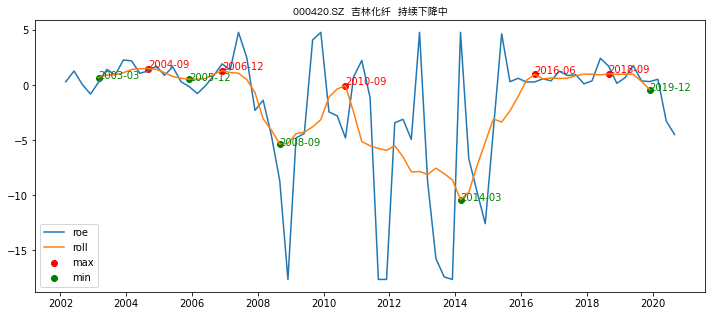

In [23]:
# showOne("000420", company, markString)

In [31]:
for i, v in yRolling.iteritems():
    print(i, v)

2003-03 0.6640682712472121
2003-06 0.9023972567728321
2003-09 0.929747953522308
2003-12 1.1057500719666022
2004-03 1.402444814837839
2004-06 1.4724087592500688
2004-09 1.4893108107861348
2004-12 1.4071422098149031
2005-03 1.1186650848761464
2005-06 0.7663522076496339
2005-09 0.6010371012257159
2005-12 0.5181381937530146
2006-03 0.5227518866102565
2006-06 0.5863515914064439
2006-09 0.9705402621714418
2006-12 1.293434614164601
2007-03 1.128084594549288
2007-06 1.060220583192621
2007-09 0.4990349863250496
2007-12 -0.6916456327936706
2008-03 -3.0762009415927167
2008-06 -4.108439090692316
2008-09 -5.363188505074739
2008-12 -5.286887284629826
2009-03 -4.418226940020063
2009-06 -4.278355635974785
2009-09 -3.7954176006917475
2009-12 -3.1441668107659537
2010-03 -1.1022026296244487
2010-06 -0.3619746756934125
2010-09 -0.06051710072461927
2010-12 -2.5014268122889556
2011-03 -5.130074989459059
2011-06 -5.510456044088159
2011-09 -5.756943743336079
2011-12 -5.92676103250114
2012-03 -5.51359527154229

In [25]:
avg = np.average(yRolling)
std = np.std(yRolling, ddof=1)

In [29]:
avg+std

1.5271602977962

## 检查最初筛选规则的有效性
从图像看有没有漏掉的

In [32]:
temp = pd.read_excel(dirPath+"chemGreaterThanStd.xlsx")

In [33]:
codes = temp.code.values
codes1 = df.code.values

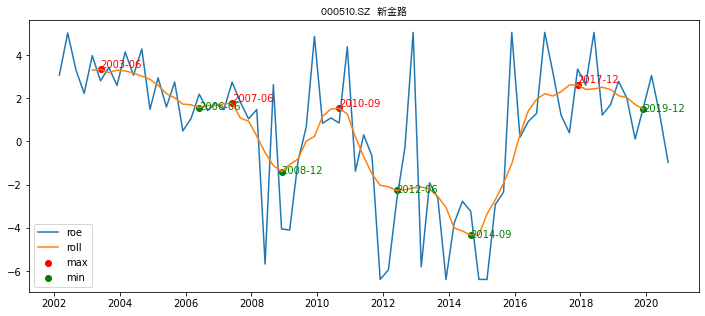

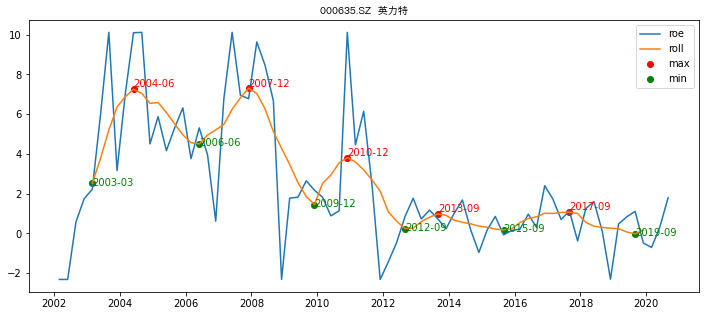

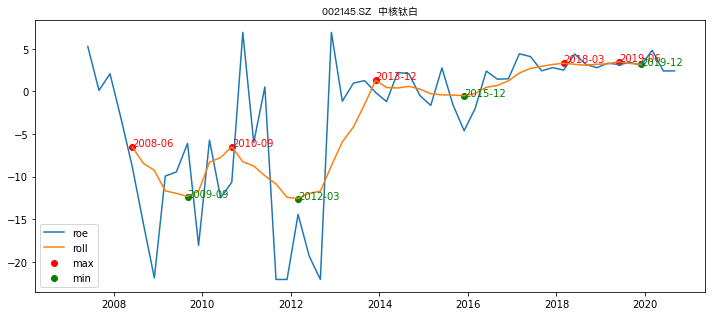

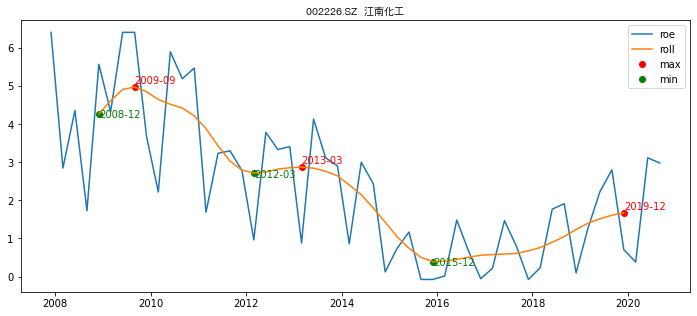

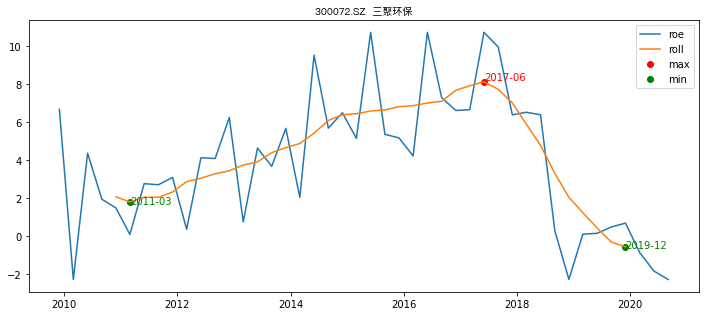

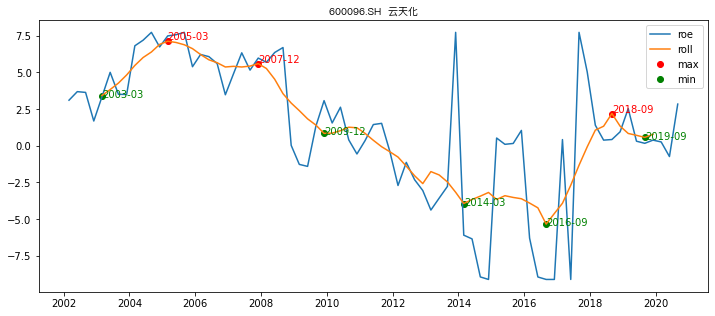

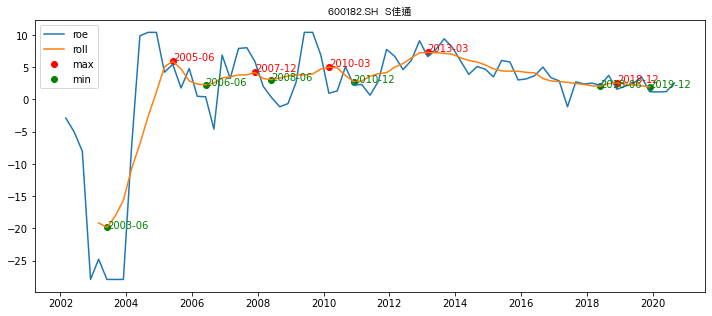

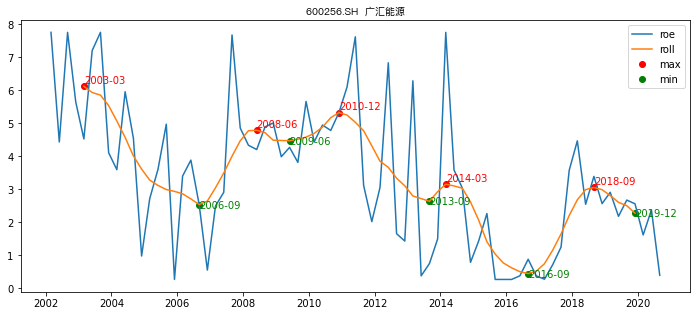

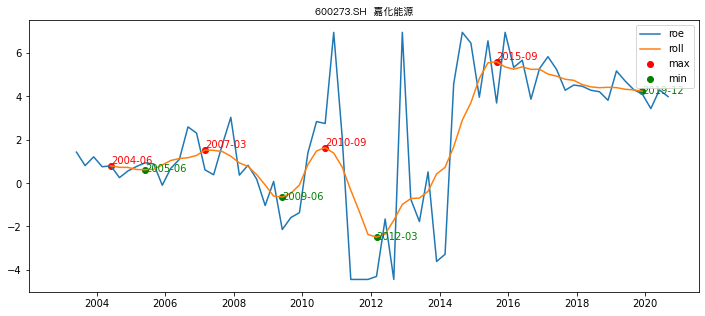

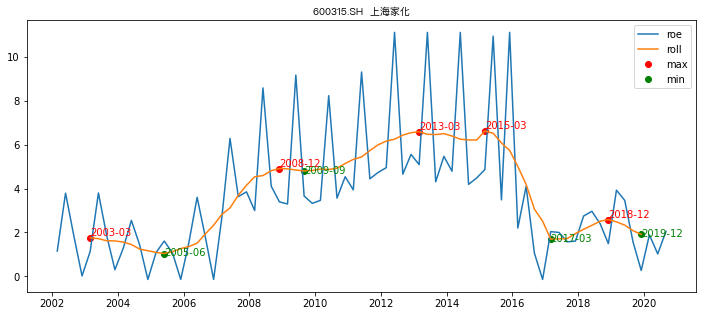

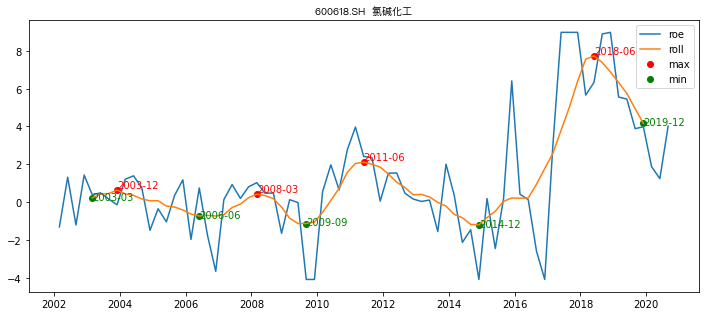

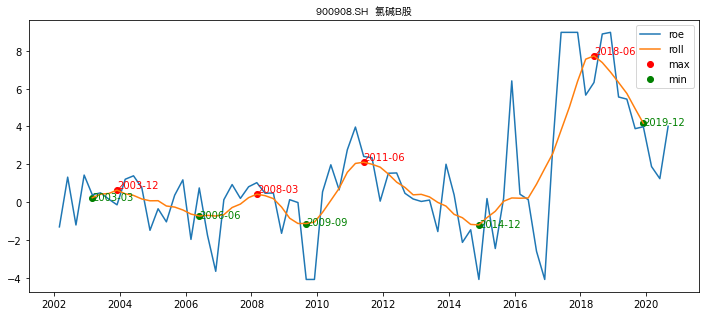

In [35]:
print()
for code in codes:
    if code not in codes1:
        showOne(code, temp)